In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data (if we have time, come back and look at datatypes and if there is a specific way we want to handle them)
column_names = pd.read_csv('raw_data/column_names.csv', sep=':', header=None)
actual_column_names = column_names.iloc[:,0].tolist()
raw_census_data_learn = pd.read_csv('raw_data/census_income_learn.csv', header=None, names=actual_column_names)
raw_census_data_test = pd.read_csv('raw_data/census_income_test.csv', header=None, names=actual_column_names)
raw_census_data_all = pd.concat([raw_census_data_learn, raw_census_data_test], ignore_index=True)
# raw_census_data_all.head().to_csv("raw_data/census_income_all_preview.csv", ",", index=False)
pd.set_option('display.max_columns', None)
raw_census_data_all.head()
raw_census_data_all.info()

# Notes for morley. We've got our data metadata so were validating what were seeing against that.
# The dataset is weighted and is unbalanced so this needs to be taken into account. 
# There appears to be duplicates in the data so lets remove them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299285 entries, 0 to 299284
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         299285 non-null  int64  
 1   class of worker                             299285 non-null  object 
 2   detailed industry recode                    299285 non-null  int64  
 3   detailed occupation recode                  299285 non-null  int64  
 4   education                                   299285 non-null  object 
 5   wage per hour                               299285 non-null  int64  
 6   enroll in edu inst last wk                  299285 non-null  object 
 7   marital stat                                299285 non-null  object 
 8   major industry code                         299285 non-null  object 
 9   major occupation code                       299285 non-null  object 
 

In [19]:
# when we looked at the raw data we saw a similar number of records, the business decsion was made to only include the most recent data, we could do a future investiation to see if this changes year over year
raw_census_data_all = raw_census_data_all[raw_census_data_all['year'] == 95]
# Drop duplicates
raw_census_data_all.drop_duplicates(inplace=True)
# after talking with the business they believe that these features will have the biggest impact on weather or not someone makes over or under 50K a year.
columns_to_keep = ['sex', 'age', 'member of a labor union', 'country of birth self', 'education', 'major occupation code', 'wage per hour', 'year', 'instance weight', 'target']
raw_census_data_all = raw_census_data_all[columns_to_keep]
# only going to look at the most recent year


# dont know how much data validation I should be doing here but lets move on.

# Going to update our target value to be 0 or 1 I'll wait to do this until we have a better understanding of the data
# raw_census_data_all['target'] = raw_census_data_all['target'].replace({'-50000': 0, '50000': 1})

raw_census_data_all.to_csv("raw_data/census_income_all_cleaned.csv", ",", index=False)
census_income_all = pd.read_csv('raw_data/census_income_all_cleaned.csv')

/var/folders/58/sz04nswx0ys7gx6frmv625t00000gn/T/ipykernel_91967/2588514644.py:16: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  raw_census_data_all.to_csv("raw_data/census_income_all_cleaned.csv", ",", index=False)


       sex  instance weight
0   Female     1.313315e+08
1     Male     1.251344e+08


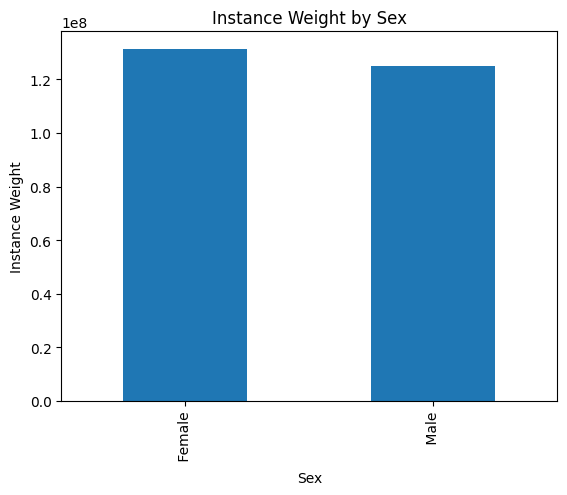

In [ ]:
# Plan now is to plot all of my key features to get an understanding of the data

grouped_data = census_income_all.groupby(['sex'])['instance weight'].sum().reset_index()
print(grouped_data)

grouped_data.plot(kind='bar', x='sex', y='instance weight')

plt.xlabel('Sex')
plt.ylabel('Instance Weight')
plt.title('Instance Weight by Sex')
plt.legend().set_visible(False)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['sex', 'age', 'member of a labor union', 'country of birth self', 'education', 'major occupation code', 'wage per hour']

for feature in features:
    plt.figure(figsize=(8, 6))
    
    if census_income_all[feature].dtype == 'object':
        # Categorical feature: use bar plot with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.countplot, feature)
        g.set_axis_labels(feature.capitalize(), 'Count')
        g.set_titles(col_template="Target: {col_name}")
    else:
        # Numerical feature: use histogram with FacetGrid
        g = sns.FacetGrid(census_income_all, col="target", height=4, aspect=1)
        g.map(sns.histplot, feature, weights='instance_weight', bins=30, kde=False)
        g.set_axis_labels(feature.capitalize(), 'Sum of Instance Weight')
        g.set_titles(col_template="Target: {col_name}")
    
    plt.tight_layout()
    plt.show()



ModuleNotFoundError: No module named 'seaborn'